In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 9CE4-955D

 Directory of C:\Users\artur\Documents\U.S.-WildFires

04/21/2020  05:07 PM    <DIR>          .
04/21/2020  05:07 PM    <DIR>          ..
04/21/2020  01:30 AM             1,928 .gitignore
04/21/2020  02:55 AM    <DIR>          .ipynb_checkpoints
04/21/2020  02:55 AM    <DIR>          Data
04/21/2020  02:54 AM                 0 README.md
04/21/2020  05:07 PM           141,069 Untitled.ipynb
               3 File(s)        142,997 bytes
               4 Dir(s)  27,085,139,968 bytes free


# Column descriptions

### STAT_CAUSE_CODE	
- 1 = Lighting
- 2 = Equipment Use
- 3 = Smoking
- 4 = Campfire
- 5 = Debris Burning
- 6 = Railroad
- 7 = Arson
- 8 = Children
- 9 = Miscellaneous

### OWNER_CODE
- 5 = USFS (United States Forest Service)
- 6 = Other Federal
- 13 = State or Private
- 14 = Missing/Not Specified

### FIRESIZECLASS
Code for fire size based on the number of acres within the final fire perimeter expenditures 
- A=greater than 0 but less than or equal to 0.25 acres
- B=0.26-9.9 acres
- C=10.0-99.9 acres
- D=100-299 acres
- E=300 to 999 acres
- F=1000 to 4999 acres
- G=5000+ acres

### CONT_DATE 
##### Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).
### CONT_DOY 
##### Day of year on which the fire was declared contained or otherwise controlled.
### CONT_TIME 
##### Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).

# Libraries and Functions

In [46]:
#essentials for eda
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

#modeling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Model Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


In [2]:
def encode_me(column, dataframe):
    '''
    Receive column name and dataframe and return dataframe with dummy variables and removed columns.
    column: String for the column we want to turn into dummy variables.
    dataframe: dataframe we will work with.
    '''
    dummies = pd.get_dummies(dataframe[column]) #creating dummy variables in our dataframe.
    dummies.drop(dummies.columns[0], axis=1, inplace=True) #dropping columns no longer needed
    rename_dict = {}
    for c in dummies.columns:
        rename_dict[c] = str(column) + '_' + str(c) 
    dummies.rename(columns = rename_dict,inplace=True) #renaming dataframe from dummies to orignal name
    dataframe = dataframe.join(dummies) #having the dataframe saved as the encoded data.
    dataframe.drop(column,axis=1, inplace=True)
    return dataframe

In [43]:
def class_report_todataframe(y,X):
    '''
    Enter y test and x test into function and will return classification report in form of a data 
    frame.
    y: y_test
    X: X_test predictions of the model. 
    '''
    return pd.DataFrame(classification_report(y, X, output_dict= True))

In [54]:
def feature_model_importances(model, df):

#loop to show name of column
    lst=[]
    for coef,columns in zip(list(df.columns),list(model.feature_importances_)):
        lst.append((columns,coef))
    return sorted(lst)

# Accessing data from Sqlite file

In [3]:
con = sqlite3.connect('Data/FPA_FOD_20170508.sqlite')
cursor = con.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")


In [5]:
cursor.fetchall()

[('spatial_ref_sys',),
 ('spatialite_history',),
 ('sqlite_sequence',),
 ('geometry_columns',),
 ('spatial_ref_sys_aux',),
 ('views_geometry_columns',),
 ('virts_geometry_columns',),
 ('geometry_columns_statistics',),
 ('views_geometry_columns_statistics',),
 ('virts_geometry_columns_statistics',),
 ('geometry_columns_field_infos',),
 ('views_geometry_columns_field_infos',),
 ('virts_geometry_columns_field_infos',),
 ('geometry_columns_time',),
 ('geometry_columns_auth',),
 ('views_geometry_columns_auth',),
 ('virts_geometry_columns_auth',),
 ('sql_statements_log',),
 ('SpatialIndex',),
 ('ElementaryGeometries',),
 ('KNN',),
 ('Fires',),
 ('idx_Fires_Shape',),
 ('idx_Fires_Shape_node',),
 ('idx_Fires_Shape_rowid',),
 ('idx_Fires_Shape_parent',),
 ('NWCG_UnitIDActive_20170109',)]

In [6]:
cursor.execute("SELECT * FROM Fires limit 2").fetchall()

[(1,
  1,
  'FS-1418826',
  'FED',
  'FS-FIRESTAT',
  'FS',
  'USCAPNF',
  'Plumas National Forest',
  '0511',
  'Plumas National Forest',
  '1',
  'PNF-47',
  'BJ8K',
  'FOUNTAIN',
  None,
  None,
  None,
  None,
  None,
  2005,
  2453403.5,
  33,
  '1300',
  9.0,
  'Miscellaneous',
  2453403.5,
  33,
  '1730',
  0.1,
  'A',
  40.03694444,
  -121.00583333,
  5.0,
  'USFS',
  'CA',
  '63',
  '063',
  'Plumas',
  b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@|\x01\x00\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xfe'),
 (2,
  2,
  'FS-1418827',
  'FED',
  'FS-FIRESTAT',
  'FS',
  'USCAENF',
  'Eldorado National Forest',
  '0503',
  'Eldorado National Forest',
  '13',
  '13',
  'AAC0',
  'PIGEON',
  None,
  None,
  None,
  None,
  None,
  2004,
  2453137.5,
  133,
  '0845',
  1.0,
  'Lightning',
  2453137.5,
  133,
  '1530',
  0.25,
  'A',
  38.93305556,
  -120.40444444,
  5.0,
  'USFS',
  'CA',
  '61',
  '061',
  'P

In [7]:
cursor.execute('PRAGMA table_info(Fires)')
cursor.fetchall()

[(0, 'OBJECTID', 'integer', 1, None, 1),
 (1, 'FOD_ID', 'int32', 0, None, 0),
 (2, 'FPA_ID', 'text(100)', 0, None, 0),
 (3, 'SOURCE_SYSTEM_TYPE', 'text(255)', 0, None, 0),
 (4, 'SOURCE_SYSTEM', 'text(30)', 0, None, 0),
 (5, 'NWCG_REPORTING_AGENCY', 'text(255)', 0, None, 0),
 (6, 'NWCG_REPORTING_UNIT_ID', 'text(255)', 0, None, 0),
 (7, 'NWCG_REPORTING_UNIT_NAME', 'text(255)', 0, None, 0),
 (8, 'SOURCE_REPORTING_UNIT', 'text(30)', 0, None, 0),
 (9, 'SOURCE_REPORTING_UNIT_NAME', 'text(255)', 0, None, 0),
 (10, 'LOCAL_FIRE_REPORT_ID', 'text(255)', 0, None, 0),
 (11, 'LOCAL_INCIDENT_ID', 'text(255)', 0, None, 0),
 (12, 'FIRE_CODE', 'text(10)', 0, None, 0),
 (13, 'FIRE_NAME', 'text(255)', 0, None, 0),
 (14, 'ICS_209_INCIDENT_NUMBER', 'text(255)', 0, None, 0),
 (15, 'ICS_209_NAME', 'text(255)', 0, None, 0),
 (16, 'MTBS_ID', 'text(255)', 0, None, 0),
 (17, 'MTBS_FIRE_NAME', 'text(50)', 0, None, 0),
 (18, 'COMPLEX_NAME', 'text(255)', 0, None, 0),
 (19, 'FIRE_YEAR', 'int16', 0, None, 0),
 (20, '

In [8]:
cursor.description

(('cid', None, None, None, None, None, None),
 ('name', None, None, None, None, None, None),
 ('type', None, None, None, None, None, None),
 ('notnull', None, None, None, None, None, None),
 ('dflt_value', None, None, None, None, None, None),
 ('pk', None, None, None, None, None, None))

In [9]:
cursor.fetchone()

# Eda And Data Cleaning

In [10]:
pd_con = sqlite3.connect("Data/FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT * FROM Fires LIMIT 100000;", pd_con)
pd.set_option('display.max_columns', None)
df

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,101068,FS-325949,FED,FS-FIRESTAT,FS,USORMHF,Mt. Hood National Forest,0606,Mt. Hood National Forest,25,None,None,WILSON,None,None,None,None,None,1997,2450691.5,243,1700,1.0,Lightning,2450692.5,244.0,1500,0.10,A,45.048611,-121.769167,5.0,USFS,OR,None,None,None,b'\x00\x01\xad\x10\x00\x00\xac4\xd7\x06:q^\xc0...
99996,99997,101069,FS-325950,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,90,None,None,PEEL,None,None,None,None,None,1997,2450685.5,237,1900,9.0,Miscellaneous,2450686.5,238.0,1800,1.00,B,40.016667,-120.753333,5.0,USFS,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x8c\xd5\xff\x9c60^\...
99997,99998,101070,FS-325951,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,91,None,None,MEADOW,None,None,None,None,None,1997,2450691.5,243,1409,9.0,Miscellaneous,2450691.5,243.0,1930,2.00,B,40.056667,-120.225000,5.0,USFS,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00dffff\x0e^\xc006{\xd...
99998,99999,101071,FS-325952,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,92,None,None,DOYLE,None,None,None,None,None,1997,2450692.5,244,1754,1.0,Lightning,2450692.5,244.0,2230,2.00,B,39.985000,-120.133333,5.0,USFS,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00D\xf4\x84\x88\x88\x0...


In [11]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [12]:
df.STATE.value_counts()

CA    19525
AZ    13897
OR    12093
ID     9826
MT     7164
NM     5789
CO     3521
WA     3403
UT     3269
WY     1820
MO     1737
MS     1500
FL     1400
AR     1343
NV     1252
NC     1089
MN     1083
SD     1062
KY     1012
MI      935
SC      888
AL      792
LA      765
TX      734
GA      606
TN      556
OK      544
OH      434
WI      394
VA      361
AK      289
IL      205
ND      147
IN      112
WV      106
NE      105
PA      100
KS       78
NH       38
VT       21
NY        3
ME        2
Name: STATE, dtype: int64

In [13]:
#looping through states to show show a visual in the next cell of where fires occur the most
state_fires = {}
for idx, row in df.iterrows():
    a = str(row.STATE)
    split = a.split(',')
    for x in split:
        if x in state_fires:
            state_fires[x] += 1
        else: 
            state_fires[x] = 1

In [14]:
state_fires

{'CA': 19525,
 'NM': 5789,
 'OR': 12093,
 'NC': 1089,
 'WY': 1820,
 'CO': 3521,
 'WA': 3403,
 'MT': 7164,
 'UT': 3269,
 'AZ': 13897,
 'SD': 1062,
 'AR': 1343,
 'NV': 1252,
 'ID': 9826,
 'MN': 1083,
 'TX': 734,
 'FL': 1400,
 'SC': 888,
 'LA': 765,
 'OK': 544,
 'KS': 78,
 'MO': 1737,
 'NE': 105,
 'MI': 935,
 'KY': 1012,
 'OH': 434,
 'IN': 112,
 'VA': 361,
 'IL': 205,
 'TN': 556,
 'GA': 606,
 'AK': 289,
 'ND': 147,
 'WV': 106,
 'WI': 394,
 'AL': 792,
 'NH': 38,
 'PA': 100,
 'MS': 1500,
 'ME': 2,
 'VT': 21,
 'NY': 3}

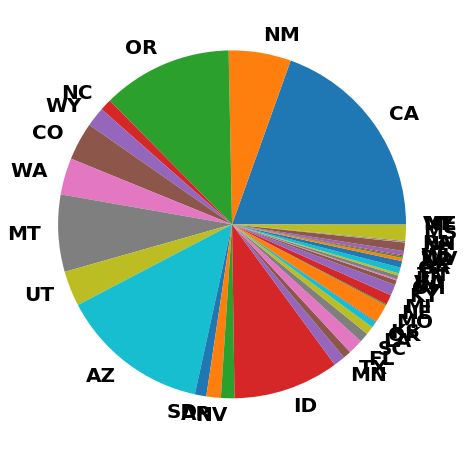

In [18]:
v = state_fires.values() 
k = state_fires.keys()  
f = [float(x) for x in v]  
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.pie(f, labels =k, autopct=None)

plt.show()

In [19]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [20]:
df = df.drop(columns = ['Shape', 'OBJECTID', 'FPA_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME',
                        'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME',
                       'FOD_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT',
                        'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_NAME', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'])
df

,SOURCE_REPORTING_UNIT_NAME,FIRE_CODE,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE
0,Plumas National Forest,BJ8K,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA
1,Eldorado National Forest,AAC0,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA
2,Eldorado National Forest,A32W,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA
3,Eldorado National Forest,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA
4,Eldorado National Forest,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Mt. Hood National Forest,None,1997,2450691.5,243,1700,1.0,Lightning,2450692.5,244.0,1500,0.10,A,45.048611,-121.769167,5.0,USFS,OR
99996,Plumas National Forest,None,1997,2450685.5,237,1900,9.0,Miscellaneous,2450686.5,238.0,1800,1.00,B,40.016667,-120.753333,5.0,USFS,CA
99997,Plumas National Forest,None,1997,2450691.5,243,1409,9.0,Miscellaneous,2450691.5,243.0,1930,2.00,B,40.056667,-120.225000,5.0,USFS,CA
99998,Plumas National Forest,None,1997,2450692.5,244,1754,1.0,Lightning,2450692.5,244.0,2230,2.00,B,39.985000,-120.133333,5.0,USFS,CA


In [21]:
df.OWNER_DESCR.value_counts()

USFS                     84709
STATE OR PRIVATE         11301
MISSING/NOT SPECIFIED     3218
OTHER FEDERAL              772
Name: OWNER_DESCR, dtype: int64

In [22]:
owner_land = {}
for idx, row in df.iterrows():
    a = str(row.OWNER_DESCR)
    split = a.split(',')
    for x in split:
        if x in owner_land:
            owner_land[x] += 1
        else: 
            owner_land[x] = 1

In [23]:
owner_land

{'USFS': 84709,
 'STATE OR PRIVATE': 11301,
 'MISSING/NOT SPECIFIED': 3218,
 'OTHER FEDERAL': 772}

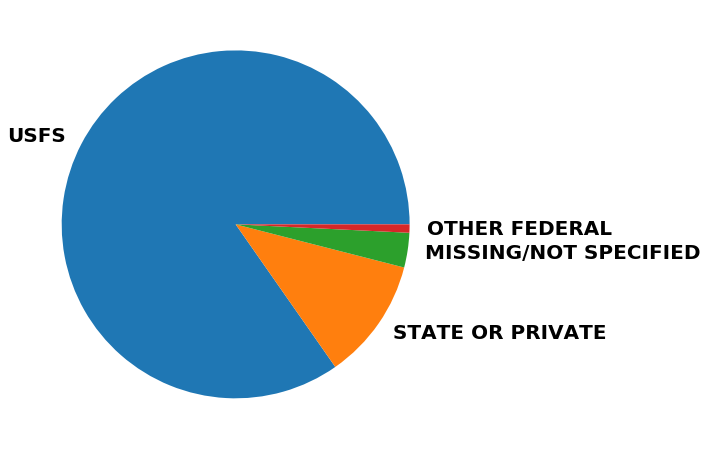

In [24]:
v_owner = owner_land.values() 
k_owner = owner_land.keys()  
f_owner = [float(x) for x in v_owner]  
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.pie(f_owner, labels =k_owner, autopct=None)

plt.show()

In [25]:
df.STAT_CAUSE_DESCR.value_counts()

Lightning         53475
Campfire          13347
Miscellaneous     11322
Arson              9867
Debris Burning     4537
Equipment Use      3312
Smoking            2533
Children           1117
Railroad            490
Name: STAT_CAUSE_DESCR, dtype: int64

In [26]:
wildfire_cause = {}
for idx, row in df.iterrows():
    a = str(row.STAT_CAUSE_DESCR)
    split = a.split(',')
    for x in split:
        if x in wildfire_cause:
            wildfire_cause[x] += 1
        else: 
            wildfire_cause[x] = 1

In [27]:
wildfire_cause

{'Miscellaneous': 11322,
 'Lightning': 53475,
 'Debris Burning': 4537,
 'Campfire': 13347,
 'Equipment Use': 3312,
 'Arson': 9867,
 'Children': 1117,
 'Railroad': 490,
 'Smoking': 2533}

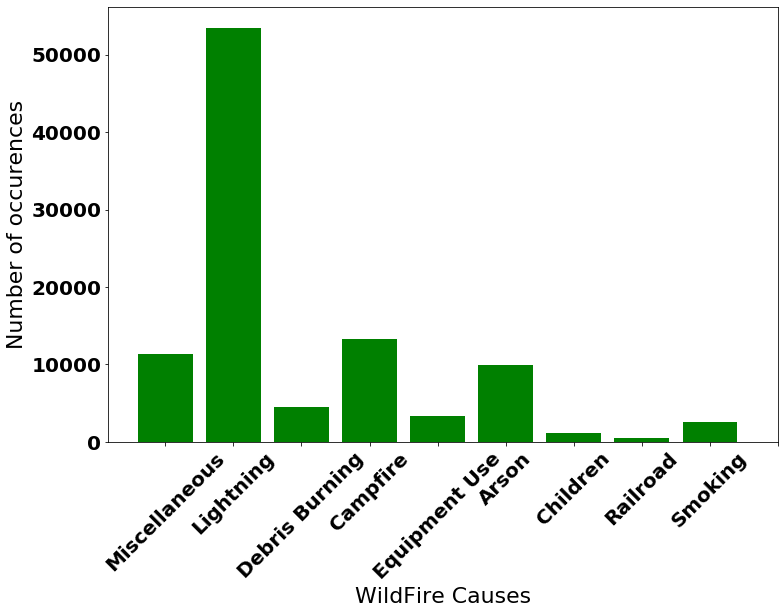

In [28]:
v_cause = wildfire_cause.values() 
k_cause = wildfire_cause.keys()  
f_cause = [float(x) for x in v_cause] 

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.bar(k_cause, f_cause, color = 'green')
plt.ylabel('Number of occurences')
plt.xlabel('WildFire Causes')
plt.xticks(range(0,10), rotation=45)
plt.savefig('US wildfires')

plt.show()

In [29]:
df1 = df.drop(columns = ['SOURCE_REPORTING_UNIT_NAME', 'FIRE_CODE', 'LATITUDE', 'LONGITUDE'])
df1

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,OWNER_CODE,OWNER_DESCR,STATE
0,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,5.0,USFS,CA
1,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,5.0,USFS,CA
2,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,13.0,STATE OR PRIVATE,CA
3,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,5.0,USFS,CA
4,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,5.0,USFS,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1997,2450691.5,243,1700,1.0,Lightning,2450692.5,244.0,1500,0.10,A,5.0,USFS,OR
99996,1997,2450685.5,237,1900,9.0,Miscellaneous,2450686.5,238.0,1800,1.00,B,5.0,USFS,CA
99997,1997,2450691.5,243,1409,9.0,Miscellaneous,2450691.5,243.0,1930,2.00,B,5.0,USFS,CA
99998,1997,2450692.5,244,1754,1.0,Lightning,2450692.5,244.0,2230,2.00,B,5.0,USFS,CA


In [30]:
df_modeling = encode_me('FIRE_SIZE_CLASS', df1)
df_modeling = encode_me('STATE', df_modeling)
df_modeling

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,OWNER_CODE,OWNER_DESCR,FIRE_SIZE_CLASS_B,FIRE_SIZE_CLASS_C,FIRE_SIZE_CLASS_D,FIRE_SIZE_CLASS_E,FIRE_SIZE_CLASS_F,FIRE_SIZE_CLASS_G,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,5.0,USFS,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,5.0,USFS,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,13.0,STATE OR PRIVATE,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,5.0,USFS,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,5.0,USFS,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1997,2450691.5,243,1700,1.0,Lightning,2450692.5,244.0,1500,0.10,5.0,USFS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99996,1997,2450685.5,237,1900,9.0,Miscellaneous,2450686.5,238.0,1800,1.00,5.0,USFS,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99997,1997,2450691.5,243,1409,9.0,Miscellaneous,2450691.5,243.0,1930,2.00,5.0,USFS,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99998,1997,2450692.5,244,1754,1.0,Lightning,2450692.5,244.0,2230,2.00,5.0,USFS,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df_modeling.dropna(inplace=True)

In [32]:
df_modeling.isna().sum()

FIRE_YEAR            0
DISCOVERY_DATE       0
DISCOVERY_DOY        0
DISCOVERY_TIME       0
STAT_CAUSE_CODE      0
STAT_CAUSE_DESCR     0
CONT_DATE            0
CONT_DOY             0
CONT_TIME            0
FIRE_SIZE            0
OWNER_CODE           0
OWNER_DESCR          0
FIRE_SIZE_CLASS_B    0
FIRE_SIZE_CLASS_C    0
FIRE_SIZE_CLASS_D    0
FIRE_SIZE_CLASS_E    0
FIRE_SIZE_CLASS_F    0
FIRE_SIZE_CLASS_G    0
STATE_AL             0
STATE_AR             0
STATE_AZ             0
STATE_CA             0
STATE_CO             0
STATE_FL             0
STATE_GA             0
STATE_ID             0
STATE_IL             0
STATE_IN             0
STATE_KS             0
STATE_KY             0
STATE_LA             0
STATE_ME             0
STATE_MI             0
STATE_MN             0
STATE_MO             0
STATE_MS             0
STATE_MT             0
STATE_NC             0
STATE_ND             0
STATE_NE             0
STATE_NH             0
STATE_NM             0
STATE_NV             0
STATE_NY   

# Beginning of Modeling

In [33]:
df_modeling['DISCOVERY_TIME'] = pd.to_numeric(df_modeling['DISCOVERY_TIME'])
df_modeling['CONT_TIME'] = pd.to_numeric(df_modeling['CONT_TIME'])
df_modeling.CONT_TIME.dtype

dtype('int64')

In [34]:
X = df_modeling.drop(columns=['STAT_CAUSE_DESCR', 'OWNER_DESCR', 'STAT_CAUSE_CODE'])
y = df_modeling['STAT_CAUSE_CODE']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))


74871 24958 74871 24958


# Basic Random Forest Model

In [36]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

C:\Users\artur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
rfc_X_test = rfc.predict(X_test)
accuracy_rfc = str(metrics.accuracy_score(y_test, rfc_X_test))
accuracy_rfc

'0.6640756470871063'

In [81]:
rfc_report = class_report_todataframe(y_test, rfc_X_test)
rfc_report

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,accuracy,macro avg,weighted avg
precision,0.781027,0.188889,0.106122,0.489788,0.425552,0.523810,0.609485,0.128571,0.347095,0.664076,0.400038,0.614638
recall,0.938077,0.102286,0.043261,0.396165,0.393079,0.094828,0.604499,0.031802,0.239620,0.664076,0.315957,0.664076
f1-score,0.852379,0.132709,0.061466,0.438030,0.408672,0.160584,0.606982,0.050992,0.283514,0.664076,0.332814,0.631935
support,13323.000000,831.000000,601.000000,3390.000000,1127.000000,116.000000,2445.000000,283.000000,2842.000000,0.664076,24958.000000,24958.000000


In [80]:
feature_model_importances(rfc, df_modeling)

[(4.1291212565363125e-06, 'STATE_KS'),
 (1.2254268147153394e-05, 'STATE_NH'),
 (0.00011020442597732186, 'STATE_TX'),
 (0.00025479407294580464, 'STATE_MT'),
 (0.00027345355903160925, 'STATE_NC'),
 (0.00039404029622744325, 'STATE_ID'),
 (0.0004074773674531764, 'STATE_GA'),
 (0.00046857773557269186, 'STATE_VT'),
 (0.0004739548180475444, 'FIRE_SIZE_CLASS_D'),
 (0.0005697812047466865, 'STATE_MS'),
 (0.0005954900850456071, 'STATE_OH'),
 (0.0007276703029735092, 'STATE_FL'),
 (0.000779505442039636, 'FIRE_SIZE_CLASS_C'),
 (0.0010676900995250176, 'FIRE_SIZE_CLASS_B'),
 (0.0011505854099309978, 'STATE_NM'),
 (0.0012794814397327021, 'STATE_TN'),
 (0.0014762757660628403, 'STATE_CA'),
 (0.0014827662718283163, 'STATE_VA'),
 (0.0017733157915194627, 'STATE_PA'),
 (0.00184311212811973, 'OWNER_DESCR'),
 (0.0019706009508295703, 'STATE_NV'),
 (0.002066177485232984, 'FIRE_SIZE_CLASS_E'),
 (0.0024536699855519056, 'STATE_OR'),
 (0.0025326904032930515, 'STATE_NE'),
 (0.002658988163452297, 'STATE_OK'),
 (0.00278

# Random Forest Parameter Tuned

In [ ]:
rfc_param= {'n_estimators' : range(1,30,2),
        'max_depth' : range(1,21,2),
        'min_samples_split' : range(2,12,2)}

rfc_pmtuned = RandomForestClassifier()

grid_rfc = GridSearchCV(rfc_pmtuned, rfc_param, cv=5)

grid_rfc = grid_rfc.fit(X_train, y_train)

# AdaBoost Model

In [47]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
ada_X_test = adaboost.predict(X_test)

In [48]:
class_report_todataframe(y_test, ada_X_test)

C:\Users\artur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,accuracy,macro avg,weighted avg
precision,0.688675,0.222222,0.0,0.417469,0.454647,0.0,0.618512,0.0,0.313337,0.631902,0.301651,0.548532
recall,0.959844,0.002407,0.0,0.179056,0.360248,0.0,0.584867,0.0,0.189303,0.631902,0.252858,0.631902
f1-score,0.801957,0.004762,0.0,0.250619,0.401980,0.0,0.601219,0.0,0.236017,0.631902,0.255173,0.566223
support,13323.000000,831.000000,601.0,3390.000000,1127.000000,116.0,2445.000000,283.0,2842.000000,0.631902,24958.000000,24958.000000


In [83]:
feature_model_importances(adaboost, df_modeling)

[(0.0, 'FIRE_SIZE'),
 (0.0, 'FIRE_SIZE_CLASS_C'),
 (0.0, 'FIRE_SIZE_CLASS_D'),
 (0.0, 'FIRE_YEAR'),
 (0.0, 'OWNER_CODE'),
 (0.0, 'OWNER_DESCR'),
 (0.0, 'STATE_AR'),
 (0.0, 'STATE_CA'),
 (0.0, 'STATE_FL'),
 (0.0, 'STATE_GA'),
 (0.0, 'STATE_ID'),
 (0.0, 'STATE_KS'),
 (0.0, 'STATE_MO'),
 (0.0, 'STATE_NC'),
 (0.0, 'STATE_NH'),
 (0.0, 'STATE_NM'),
 (0.0, 'STATE_OH'),
 (0.0, 'STATE_OR'),
 (0.0, 'STATE_SD'),
 (0.0, 'STATE_TN'),
 (0.0, 'STATE_TX'),
 (0.0, 'STATE_VA'),
 (0.0, 'STATE_VT'),
 (0.02, 'FIRE_SIZE_CLASS_B'),
 (0.02, 'FIRE_SIZE_CLASS_E'),
 (0.02, 'FIRE_SIZE_CLASS_F'),
 (0.02, 'FIRE_SIZE_CLASS_G'),
 (0.02, 'STATE_AL'),
 (0.02, 'STATE_AZ'),
 (0.02, 'STATE_CO'),
 (0.02, 'STATE_IL'),
 (0.02, 'STATE_IN'),
 (0.02, 'STATE_KY'),
 (0.02, 'STATE_LA'),
 (0.02, 'STATE_ME'),
 (0.02, 'STATE_MI'),
 (0.02, 'STATE_MN'),
 (0.02, 'STATE_MS'),
 (0.02, 'STATE_MT'),
 (0.02, 'STATE_ND'),
 (0.02, 'STATE_NE'),
 (0.02, 'STATE_NV'),
 (0.02, 'STATE_NY'),
 (0.02, 'STATE_OK'),
 (0.02, 'STATE_PA'),
 (0.02, 'STATE_SC

## Adaboost with Grid Search

In [ ]:
abc_param = {base_estimator: range(0,10,2),
             n_estimators: range(0,100,2)}

abc = AdaBoostClassifier()

abc_grid = GridSearchCV(abc ,abc_param, cv=5)

# XGBoost Model

In [69]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg_X_test = xg.predict(X_test)

In [70]:
xg_report = class_report_todataframe(y_test, xg_X_test)
xg_report

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,accuracy,macro avg,weighted avg
precision,0.778213,0.275676,0.171429,0.529263,0.489614,0.615385,0.651723,0.142857,0.365753,0.685672,0.446657,0.632703
recall,0.954440,0.061372,0.009983,0.432153,0.439219,0.068966,0.642127,0.003534,0.281844,0.685672,0.321515,0.685672
f1-score,0.857364,0.100394,0.018868,0.475804,0.463050,0.124031,0.646889,0.006897,0.318362,0.685672,0.334629,0.647289
support,13323.000000,831.000000,601.000000,3390.000000,1127.000000,116.000000,2445.000000,283.000000,2842.000000,0.685672,24958.000000,24958.000000


In [55]:
feature_model_importances(xg, df_modeling)

[(0.0, 'FIRE_SIZE_CLASS_D'),
 (0.0, 'STATE_KS'),
 (0.0, 'STATE_NH'),
 (0.003688634, 'STATE_TX'),
 (0.005177881, 'OWNER_DESCR'),
 (0.005223165, 'OWNER_CODE'),
 (0.0054477374, 'STATE_MT'),
 (0.0056618396, 'STATE_GA'),
 (0.005768276, 'FIRE_SIZE'),
 (0.0058707898, 'FIRE_SIZE_CLASS_C'),
 (0.0066649886, 'STATE_ID'),
 (0.006666766, 'FIRE_SIZE_CLASS_B'),
 (0.0067933034, 'STATE_NE'),
 (0.006906139, 'STATE_TN'),
 (0.0069997255, 'STATE_VT'),
 (0.007192552, 'STATE_CA'),
 (0.0072874995, 'FIRE_YEAR'),
 (0.008179625, 'STATE_FL'),
 (0.009450818, 'STATE_MO'),
 (0.00992888, 'STATE_MS'),
 (0.010719088, 'CONT_DATE'),
 (0.01074152, 'DISCOVERY_TIME'),
 (0.01110236, 'STATE_OH'),
 (0.011113784, 'STATE_VA'),
 (0.011149688, 'STATE_NM'),
 (0.011957102, 'STATE_NC'),
 (0.011993509, 'DISCOVERY_DATE'),
 (0.012134563, 'STATE_OR'),
 (0.012285466, 'STATE_SD'),
 (0.012918714, 'STATE_AZ'),
 (0.013006597, 'STATE_LA'),
 (0.013076565, 'STAT_CAUSE_CODE'),
 (0.013929469, 'CONT_DOY'),
 (0.014548565, 'STATE_NV'),
 (0.014606215,

# XGBoost With Parameters

In [68]:
xg_parameters = {' max_depth' : [1,2],
             }

xgb_grid = XGBClassifier(num_class = 9, objective = 'multi:softmax'
)

grid_xgb = GridSearchCV(xgb_grid, xg_parameters, cv=2)

grid_xgb.fit(X_train, y_train)

KeyboardInterrupt: 

![Data gif](https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif)